# Pregunta 1

Seleccione un dataset de los propuestos por su persona en una anterior tarea, esta debe ser tabular de al menos 1000 filas y 5 columnas. Realice lo siguiente:

1.	La media, moda y la desviación estándar por columna; explique qué significa en cada caso mediante Python sin uso de librerías
2.	La media, la moda, la desviación estándar con el uso de numpy y pandas
3.	Grafique los datos y explique su comportamiento (PYTHON)

## Cargado de los datos

Usaremos la función open de python para abrir el archivo del dataset en formato csv y crearemos una estructura orientada a objetos para facilitar el manejo de nuestro dataset.

In [34]:
class Dataset:

    def __init__(self, url):
        self.load_csv(url)
    
    def load_csv(self, url):
        content = []
        with open(url) as file:
            lines = file.readlines()
            for line in lines:
                line = line.replace("\n", "")
                content.append(line.split(","))
        self.headers, self.data = content[0], content[1:]
        return self.headers, self.data
    
    def get_column(self, column):
        index = self.headers.index(column)
        try:
            return [float(x[index]) for x in self.data]
        except Exception as e:
            print(e)
            return []

dataset = Dataset("stroke-dataset.csv")

print(dataset.headers)
print(dataset.data[:3])

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
[['9046', 'Male', '67', '0', '1', 'Yes', 'Private', 'Urban', '228.69', '36.6', 'formerly smoked', '1'], ['51676', 'Female', '61', '0', '0', 'Yes', 'Self-employed', 'Rural', '202.21', 'N/A', 'never smoked', '1'], ['31112', 'Male', '80', '0', '1', 'Yes', 'Private', 'Rural', '105.92', '32.5', 'never smoked', '1']]


# Cálculo de estadísticos en python
## Cálculo de la media
La media muestral es calculada bajo la siguiente definición, considerando que se tiene una muestra $(X_1, X_2, ..., X_n)$:

$$
\bar X_n = \frac{1}{n}\sum_{i=1}^{n}{X_i} = \frac{X_1+X_2+...+X_n}{n}
$$

In [95]:
def media(lista):
    if lista != []:
        suma = sum(lista)
        return suma/len(lista)
    else:
        return None

In [96]:
age = dataset.get_column("age")
media(age)

43.226614481409015

## Cálculo de la moda

La moda es el valor más común en cuanto a frecuencia, por lo que para calcularla, obtendremos la frecuencia de cada ocurrencia y seleccionaremos la mayor.

In [90]:
from functools import reduce

def moda(lista):
    freq = {}
    for i in lista:
        if i not in freq:
            freq[i] = 1
        else:
            freq[i] = freq[i]+1
    items = [(r, s) for r, s in freq.items()]
    moda = reduce(lambda x, y: x if x[1] > y[1] else y, items)
    return moda[0]

moda(age)
    

78.0

## Cálculo de la desviación estándar

La desviación estándar de una población estadística, conjunto de datos o distribución de probabilidad es la raíz cuadrada de su varianza, que es una medida de dispersión definida como la esperanza del cuadrado de la desviación de dicha variable respecto a su media.

In [94]:
from math import sqrt

def sd(lista):
    media_ = media(lista)
    smt = [(i-media_)**2 for i in lista]
    return sqrt(media(smt))

sd(age)

22.61043402711301

# Cálculo de estadísticos con Numpy y Pandas

### Cargado de datos

Usaremos la librería pandas para leer el archivo csv y así poder obtener el dataset.

In [131]:
import pandas as pd
import numpy as np
from scipy import stats as st

In [132]:
data = pd.read_csv("stroke-dataset.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Cálculo de la media, moda y desviación estándar

Para calcular estos estadísticos, usaremos la librería numpy.

In [133]:
np.mean(data['age'])

43.226614481409015

Ya que numpy no provee un método para calcular la moda, usaremos la librería scipy, importaremos el módulo stats de esta, que provee la función mode.

In [134]:
st.mode(data['age'])

ModeResult(mode=array([78.]), count=array([102]))

In [135]:
np.std(data['age'])

22.61043402711301

Como podemos ver, los valores calculados con las librerías de python, coinciden con los valores calculados previamente.

# Gráfico de datos e interpretación

In [136]:
import matplotlib.pyplot as plt

In [138]:
strokes = data[data.stroke == 1]
strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


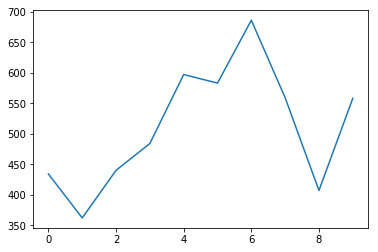

In [145]:
hist, edges = np.histogram(data['age'])

plt.plot(hist)

In [144]:
hist

array([434, 362, 440, 484, 597, 583, 686, 559, 407, 558])